In [7]:
import torch

torch.cuda.empty_cache()
from concurrent.futures import ThreadPoolExecutor

from models.ddpm_unet2d import DDPMUNet2D
from threading import  Thread
import sys
from models.resume_train import optimizer_factory
# Stupid trick because of mistake
setattr(sys.modules['__main__'], 'optimizer_factory', optimizer_factory)


dirpath = "/home/a3ilab01/h-ws/ddpm_huggan_smithsonian_butterflies_subset/"
ckpt_path = f"{dirpath}/checkpoints/"

good_ckpts = [
    f"{ckpt_path}/epoch=30-step=465-min_val_fid=2.7814.ckpt",
    f"{ckpt_path}/epoch=53-step=810-min_val_loss=0.0134.ckpt",
    f"{ckpt_path}/epoch=74-step=1125-min_train_loss=0.0168.ckpt",
    "/home/a3ilab01/h-ws/ddpm_huggan_smithsonian_butterflies_subset_resume/checkpoints/epoch=5-step=90-min_train_loss=0.0159.ckpt"
]
def gen_thread(model: DDPMUNet2D):
    return model.generate(torch.randn([32,3,128,128]),1000, clamp_output=True).cpu().permute(0,2,3,1).numpy()

images = []
models = [ DDPMUNet2D.load_from_checkpoint(ckpt).eval() for ckpt in good_ckpts]

with ThreadPoolExecutor() as executor:
    # submit() schedules the task and returns a Future object
    futures = [executor.submit(gen_thread, model) for model in models]

images = [future.result() for future in futures]

del models, futures
torch.cuda.empty_cache()


2025-07-26 11:57:09.854 | DEBUG    | models.ddpm_unet2d:__init__:386 - Init DDPMUnet2D with config:
{
    "unet": {
        "sample_size": null,
        "in_channels": 3,
        "out_channels": 3,
        "down_block_types": [
            "DownBlock2D",
            "DownBlock2D",
            "DownBlock2D",
            "DownBlock2D",
            "AttnDownBlock2D",
            "DownBlock2D"
        ],
        "mid_block_type": "UNetMidBlock2D",
        "up_block_types": [
            "UpBlock2D",
            "AttnUpBlock2D",
            "UpBlock2D",
            "UpBlock2D",
            "UpBlock2D",
            "UpBlock2D"
        ],
        "block_out_channels": [
            128,
            128,
            256,
            256,
            512,
            512
        ],
        "act_fn": "silu",
        "time_embedding_type": "positional",
        "center_input_sample": false,
        "layers_per_block": 2,
        "time_embedding_dim": null,
        "freq_shift": 0,
        "flip_s

Generating 32 samples - Steps: 0/1000 [          ] ?it/s

Generating 32 samples - Steps: 0/1000 [          ] ?it/s

Generating 32 samples - Steps: 0/1000 [          ] ?it/s

Generating 32 samples - Steps: 0/1000 [          ] ?it/s

/home/a3ilab01/h-ws/ddpm_huggan_smithsonian_butterflies_subset//checkpoints//epoch=30-step=465-min_val_fid=2.7814.ckpt


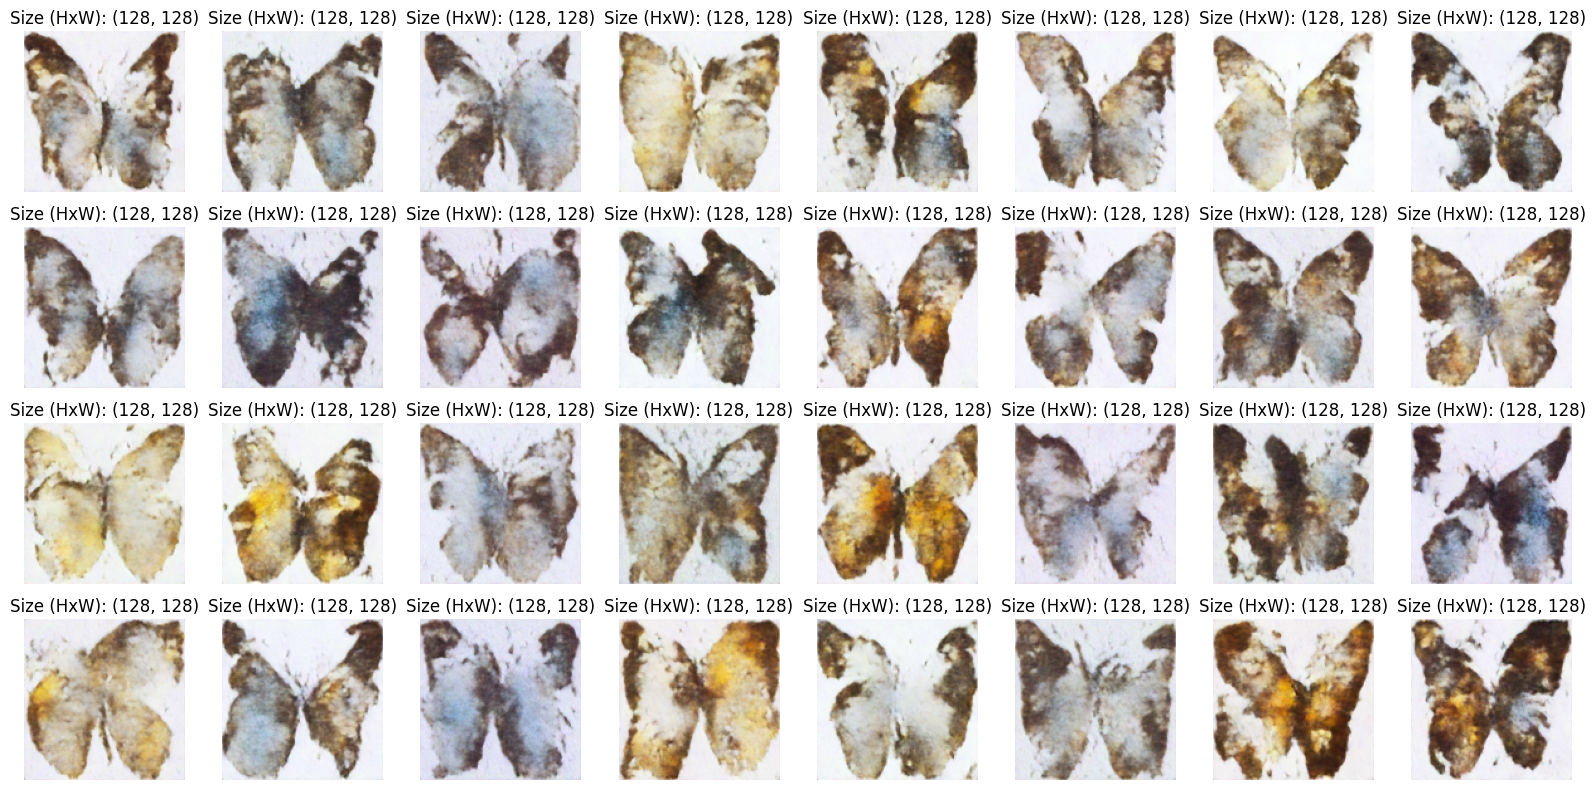


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

/home/a3ilab01/h-ws/ddpm_huggan_smithsonian_butterflies_subset//checkpoints//epoch=53-step=810-min_val_loss=0.0134.ckpt


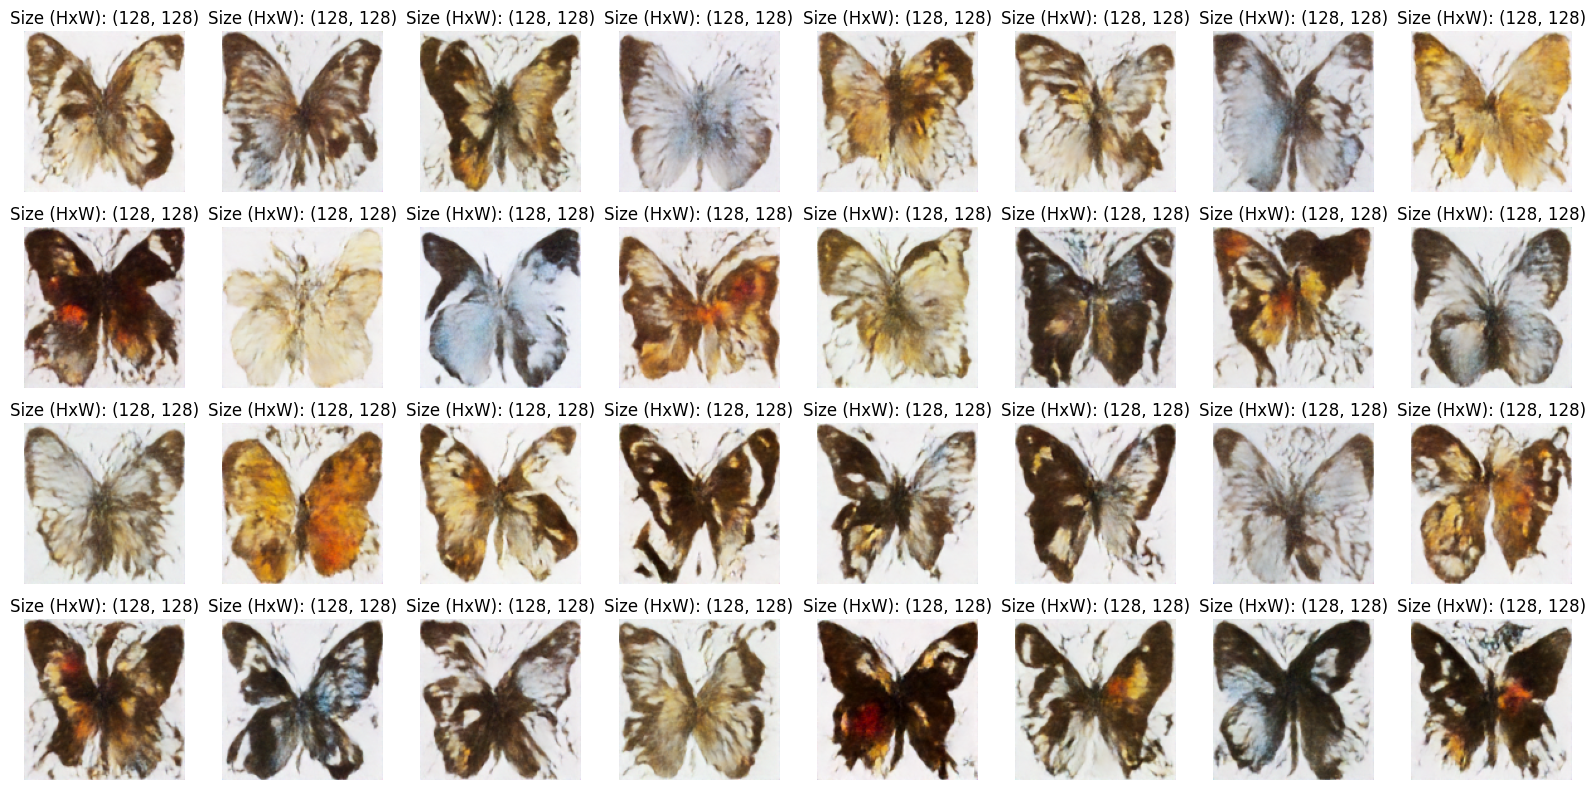


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

/home/a3ilab01/h-ws/ddpm_huggan_smithsonian_butterflies_subset//checkpoints//epoch=74-step=1125-min_train_loss=0.0168.ckpt


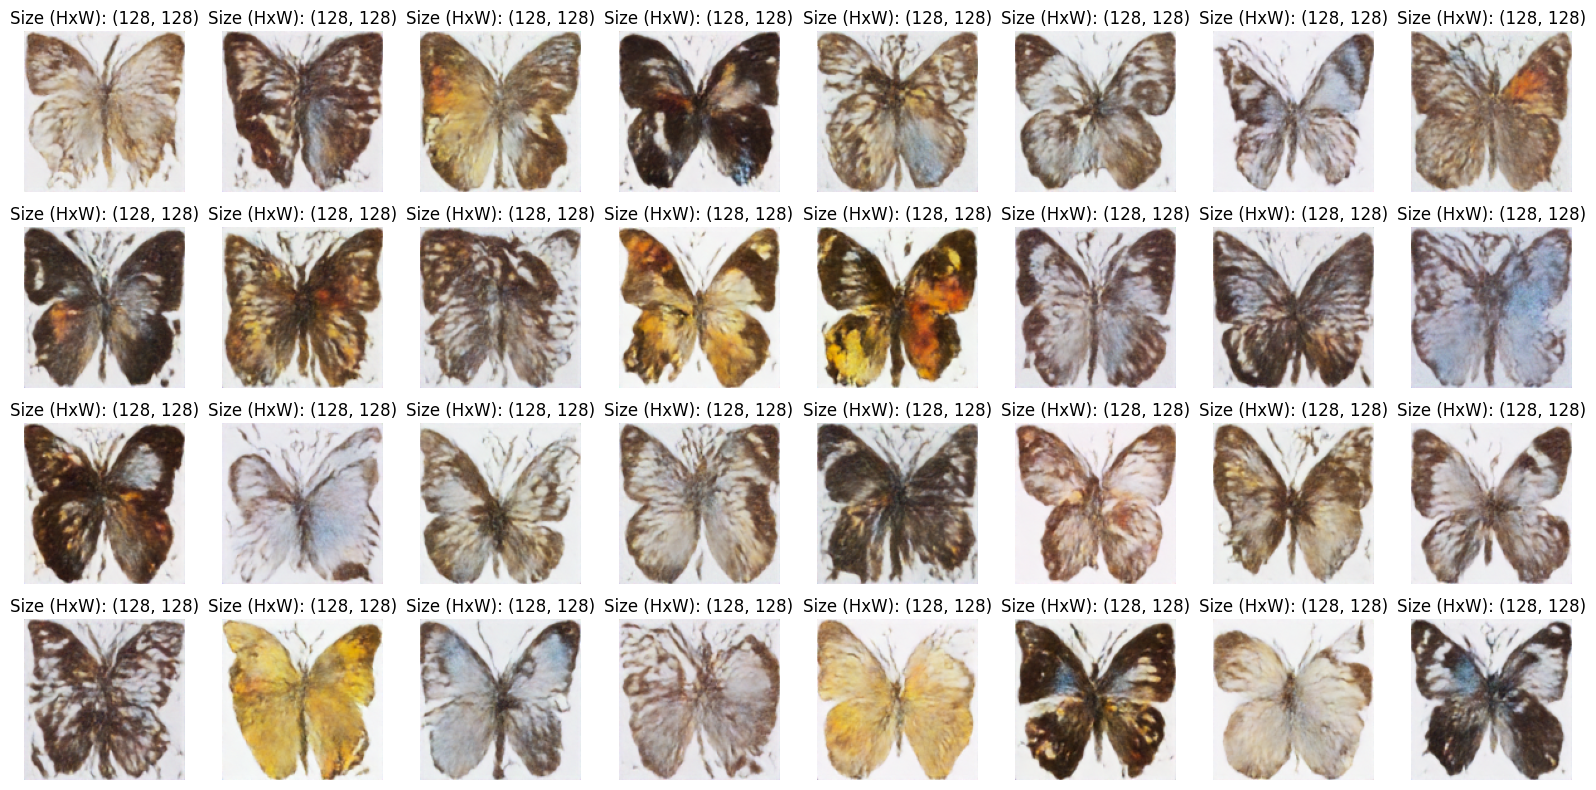


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

/home/a3ilab01/h-ws/ddpm_huggan_smithsonian_butterflies_subset_resume/checkpoints/epoch=5-step=90-min_train_loss=0.0159.ckpt


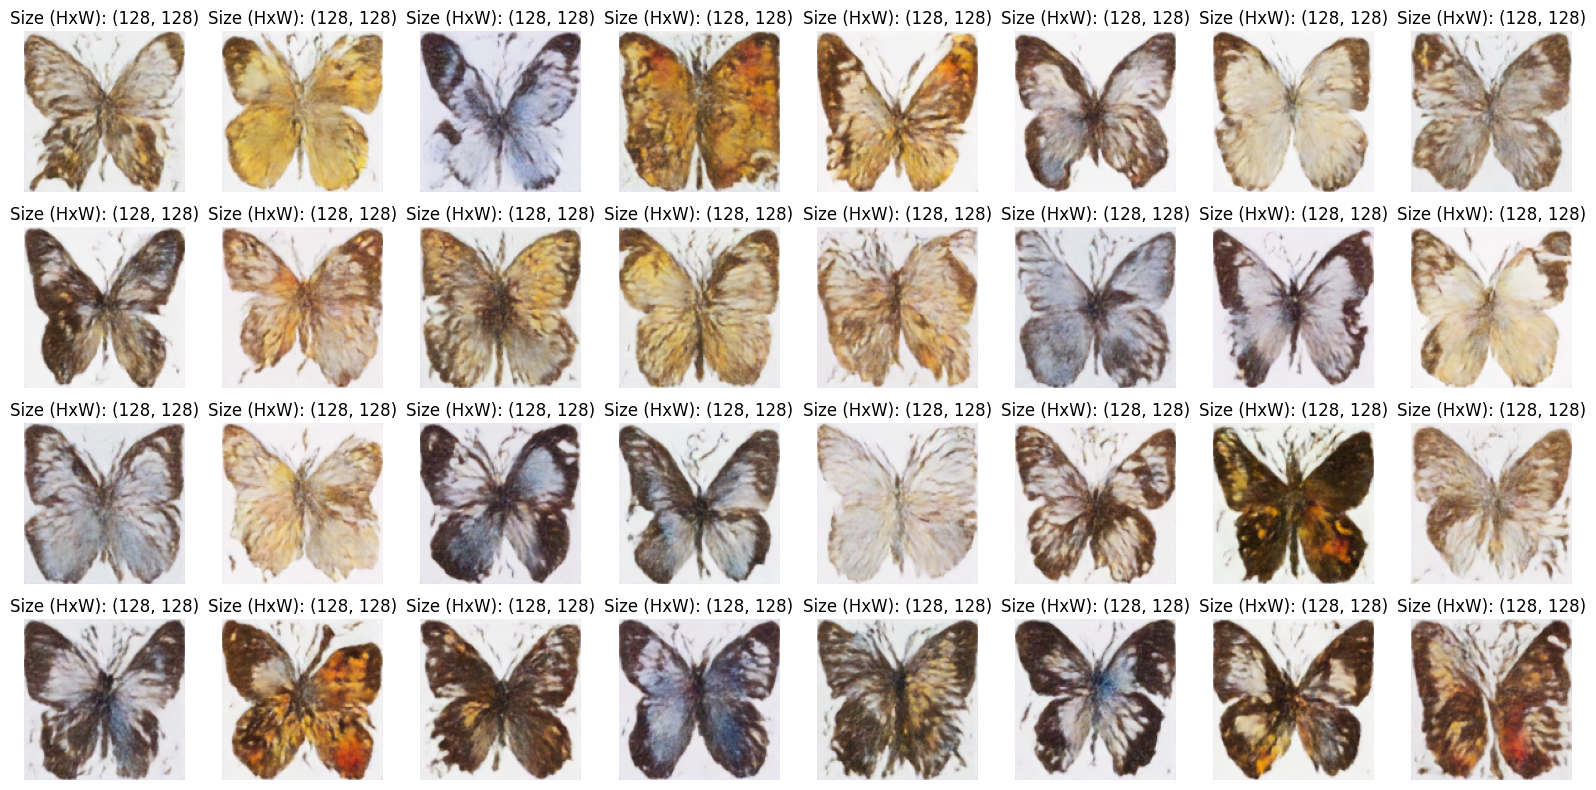


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



In [8]:
from data.huggan_smithsonian_butterflies_subset import  DataModule
for ckpt, imgs in zip(good_ckpts,images):
    print(ckpt)
    DataModule.show(imgs,8)
    print(f"\n{"~"*100}\n")